# FIFA2019 EDA

## 분석 과정
- DataFrame을 파악, 전처리

- heatmap을 통하여 전반적인 상관관계 확인

- 주요 항목을 선정하여 타 항목과의 관계 분석 


 ### **<목차>**

**1. DataFrame 파악**

**2. EDA**

    1) Nationality
    
    2) Club
   
    3) Value
    
    4) Wage
    
    5) Position
    
    6) Age
    
    7) Potential
    
    8) Preferred foot
    
    9) Body type
    
    10) Stats

# **1. DataFrame 파악**

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
from pyathena import connect
import os

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np

In [2]:
athena = connect(
    aws_access_key_id=os.environ['KIBOKO_KEY'],
    aws_secret_access_key=os.environ['KIBOKO_SECRET'],
    s3_staging_dir=os.environ['KIBOKO_STUDY_DIR'],
    region_name=os.environ['KIBOKO_REGION']
)

In [3]:
query = "SELECT * FROM dw_temp.tb_temp_fifa"

base_df = pd.read_sql(query, athena)

In [4]:
df = base_df.copy()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 88 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   idx                       18207 non-null  object
 1   id                        18207 non-null  object
 2   name                      18207 non-null  object
 3   age                       18207 non-null  object
 4   photo                     18207 non-null  object
 5   nationality               18207 non-null  object
 6   flag                      18207 non-null  object
 7   overall                   18207 non-null  object
 8   potential                 18207 non-null  object
 9   club                      18207 non-null  object
 10  club_logo                 18207 non-null  object
 11  value                     18207 non-null  object
 12  wage                      18207 non-null  object
 13  special                   18207 non-null  object
 14  preferred_foot        

In [6]:
int_columns = [
    'crossing', 
    'finishing', 
    'heading_accuracy', 
    'short_passing', 
    'volleys', 
    'dribbling', 
    'curve', 
    'fk_accuracy', 
    'long_passing', 
    'ball_control', 
    'acceleration', 
    'spring_speed', 
    'agility', 
    'reactions',
    'balance', 
    'shot_power', 
    'jumping', 
    'stamina', 
    'strength', 
    'longshots', 
    'longshots', 
    'aggression', 
    'interceiptions', 
    'positioning', 
    'vision', 
    'penalties', 
    'composure', 
    'marking', 
    'standing_tackle', 
    'slideing_tackle', 
    'gk_diving', 
    'gk_kicking', 
    'gk_positioning', 
    'gk_reflees', 
    'release_clause'
]

for column in int_columns:
    df[column] = df[column].replace('', 0).astype(int)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 88 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   idx                       18207 non-null  object
 1   id                        18207 non-null  object
 2   name                      18207 non-null  object
 3   age                       18207 non-null  object
 4   photo                     18207 non-null  object
 5   nationality               18207 non-null  object
 6   flag                      18207 non-null  object
 7   overall                   18207 non-null  object
 8   potential                 18207 non-null  object
 9   club                      18207 non-null  object
 10  club_logo                 18207 non-null  object
 11  value                     18207 non-null  object
 12  wage                      18207 non-null  object
 13  special                   18207 non-null  object
 14  preferred_foot        

In [8]:
ability_columns = [
    'ls', 
    'st',
    'rs',
    'rw', 
    'lw', 
    'lf', 
    'cf', 
    'rf', 
    'lam', 
    'cam', 
    'ram', 
    'lm', 
    'lcm', 
    'cm',
    'rcm', 
    'rm', 
    'lwb', 
    'ldm', 
    'cdm', 
    'rdm', 
    'rwb', 
    'lb', 
    'lcb', 
    'cb', 
    'rcb', 
    'rb'
]

for column in ability_columns:
    df[column] = df[column].apply(lambda x: str(x).split('+')[0]).replace('', 0).astype(float).replace(0, np.nan)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 88 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   idx                       18207 non-null  object 
 1   id                        18207 non-null  object 
 2   name                      18207 non-null  object 
 3   age                       18207 non-null  object 
 4   photo                     18207 non-null  object 
 5   nationality               18207 non-null  object 
 6   flag                      18207 non-null  object 
 7   overall                   18207 non-null  object 
 8   potential                 18207 non-null  object 
 9   club                      18207 non-null  object 
 10  club_logo                 18207 non-null  object 
 11  value                     18207 non-null  object 
 12  wage                      18207 non-null  object 
 13  special                   18207 non-null  object 
 14  prefer

In [10]:
df[['age', 'overall', 'potential']] = df[['age', 'overall', 'potential']].astype(int)

In [11]:
currency_columns = ['value', 'wage']

for column in currency_columns:
    df[column] = df[column].apply(lambda x: x.replace("€", "").replace("K", "000").replace("M", "000000").replace(".", "")).astype(int)

In [12]:
df = df[df.value != 0]
df = df[df.wage != 0]

# df = df[(df.value > 0) & (df.wage > 0)]
# df = df.drop(df[(df.value > 0) & (df.wage > 0)].index, inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17955 entries, 0 to 18206
Data columns (total 88 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   idx                       17955 non-null  object 
 1   id                        17955 non-null  object 
 2   name                      17955 non-null  object 
 3   age                       17955 non-null  int64  
 4   photo                     17955 non-null  object 
 5   nationality               17955 non-null  object 
 6   flag                      17955 non-null  object 
 7   overall                   17955 non-null  int64  
 8   potential                 17955 non-null  int64  
 9   club                      17955 non-null  object 
 10  club_logo                 17955 non-null  object 
 11  value                     17955 non-null  int64  
 12  wage                      17955 non-null  int64  
 13  special                   17955 non-null  object 
 14  prefer

In [14]:
df.describe()

,age,overall,potential,value,wage,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,fk_accuracy,long_passing,ball_control,acceleration,spring_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,longshots,aggression,interceiptions,positioning,vision,penalties,composure,marking,standing_tackle,slideing_tackle,gk_diving,gk_kicking,gk_positioning,gk_reflees,release_clause
count,17955.000000,17955.000000,17955.000000,1.795500e+04,17955.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,17955.000000,17955.000000,17955.000000,17955.000000,17955.000000,17955.000000,17955.000000,17955.000000,17955.000000,17955.000000,17955.000000,17955.000000,17955.000000,17955.000000,17955.000000,17955.000000,17955.000000,17955.000000,17955.000000,17955.000000,17955.000000,17955.000000,17955.000000,17955.000000,17955.000000,17955.000000,17955.000000,17955.000000,17955.000000,17955.000000,17955.000000,17955.000000,17955.000000,17955.000000
mean,25.095349,66.228237,71.323197,1.382112e+07,9865.831245,57.824852,57.824852,57.824852,59.049881,58.732944,58.732944,58.732944,59.049881,58.996796,58.996796,58.996796,59.743561,58.224400,58.224400,58.224400,59.743561,57.497864,56.809649,56.809649,56.809649,57.497864,56.786908,55.591155,55.591155,55.591155,56.786908,49.618881,45.464829,52.159064,58.560290,42.820718,55.272125,47.092398,42.767641,52.585909,58.259705,64.449735,64.568031,63.365469,61.657421,63.798942,55.345475,64.950265,63.054024,65.150543,47.008410,55.729825,46.566026,49.870398,53.309886,48.416263,58.495071,47.136118,47.556725,45.522417,16.543191,16.321526,16.159788,16.312336,16.637483
std,4.659778,6.921015,6.139378,4.012181e+07,22123.139872,9.105380,9.105380,9.105380,9.854583,9.813118,9.813118,9.813118,9.854583,9.742255,9.742255,9.742255,9.228645,8.783035,8.783035,8.783035,9.228645,8.965072,10.076435,10.076435,10.076435,8.965072,9.522980,11.704937,11.704937,11.704937,9.522980,18.506081,19.627074,17.547427,14.964466,17.800383,19.089539,18.521203,17.594112,15.525277,16.910560,15.275378,15.003248,15.100266,9.559339,14.507991,17.427029,12.281891,16.192014,12.980530,19.375386,17.566425,20.803837,19.661428,14.357779,15.864068,11.800976,19.995657,21.758112,21.373115,17.659490,16.873998,16.466537,16.988235,17.913829
min,16.000000,46.000000,48.000000,1.000000e+04,1000.000000,31.000000,31.000000,31.000000,25.000000,27.000000,27.000000,27.000000,25.000000,27.000000,27.000000,27.000000,27.000000,30.000000,30.000000,30.000000,27.000000,30.000000,28.000000,28.000000,28.000000,30.000000,29.000000,25.000000,25.000000,25.000000,29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,62.000000,67.000000,3.250000e+05,1000.000000,52.000000,52.000000,52.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,54.000000,52.000000,52.000000,52.000000,54.000000,51.000000,49.000000,49.000000,49.000000,51.000000,50.000000,46.000000,46.000000,46.000000,50.000000,38.000000,30.000000,44.000000,53.000000,30.000000,49.000000,34.000000,31.000000,43.000000,54.000000,57.000000,57.000000,55.000000,56.000000,56.000000,45.000000,58.000000,56.000000,58.000000,33.000000,44.000000,26.000000,38.000000,44.000000,39.000000,51.000000,30.000000,26.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,25.000000,66.000000,71.000000,7.000000e+05,3000.000000,58.000000,58.0

In [15]:
df.head()

,idx,id,name,age,photo,nationality,flag,overall,potential,club,club_logo,value,wage,special,preferred_foot,international_reputation,weak_foot,skill_move,work_rate,body_type,real_face,position,jersery_number,joined,loaned_from,contract_valid_until,height,weight,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,fk_accuracy,long_passing,ball_control,acceleration,spring_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,longshots,aggression,interceiptions,positioning,vision,penalties,composure,marking,standing_tackle,slideing_tackle,gk_diving,gk_kicking,gk_positioning,gk_reflees,release_clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,1105000000,565000,2202,Left,5,4,4,Medium/ Medium,Messi,Yes,RF,10,"Jul 1, 2004",,2021,5'7,159lbs,88.0,88.0,88.0,92.0,93.0,93.0,93.0,92.0,93.0,93.0,93.0,91.0,84.0,84.0,84.0,91.0,64.0,61.0,61.0,61.0,64.0,59.0,47.0,47.0,47.0,59.0,84,95,70,90,86,97,93,94,87,96,91,86,91,95,95,85,68,72,59,94,48,22,94,94,75,96,33,28,26,6,11,15,14,8
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,77000000,405000,2228,Right,5,4,5,High/ Low,C. Ronaldo,Yes,ST,7,"Jul 10, 2018",,2022,6'2,183lbs,91.0,91.0,91.0,89.0,90.0,90.0,90.0,89.0,88.0,88.0,88.0,88.0,81.0,81.0,81.0,88.0,65.0,61.0,61.0,61.0,65.0,61.0,53.0,53.0,53.0,61.0,84,94,89,81,87,88,81,76,77,94,89,91,87,96,70,95,95,88,79,93,63,29,95,82,85,95,28,31,23,7,11,15,14,11
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,1185000000,290000,2143,Right,5,5,5,High/ Medium,Neymar,Yes,LW,10,"Aug 3, 2017",,2022,5'9,150lbs,84.0,84.0,84.0,89.0,89.0,89.0,89.0,89.0,89.0,89.0,89.0,88.0,81.0,81.0,81.0,88.0,65.0,60.0,60.0,60.0,65.0,60.0,47.0,47.0,47.0,60.0,79,87,62,84,84,96,88,87,78,95,94,90,96,94,84,80,61,81,49,82,56,36,89,87,81,94,27,24,33,9,9,15,15,11
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,72000000,260000,1471,Right,4,3,1,Medium/ Medium,Lean,Yes,GK,1,"Jul 1, 2011",,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17,13,21,50,13,18,21,19,51,42,57,58,60,90,43,31,67,43,64,12,38,30,12,68,40,68,15,21,13,90,85,87,88,94
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,102000000,355000,2281,Right,4,5,4,High/ High,Normal,Yes,RCM,7,"Aug 30, 2015",,2023,5'11,154lbs,82.0,82.0,82.0,87.0,87.0,87.0,87.0,87.0,88.0,88.0,88.0,88.0,87.0,87.0,87.0,88.0,77.0,77.0,77.0,77.0,77.0,73.0,66.0,66.0,66.0,73.0,93,82,55,92,82,86,85,83,91,91,78,76,79,91,77,91,63,90,75,91,76,61,87,94,79,88,68,58,51,15,13,5,10,13


In [16]:
df_corr = df.corr()
df_corr

,age,overall,potential,value,wage,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,fk_accuracy,long_passing,ball_control,acceleration,spring_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,longshots,aggression,interceiptions,positioning,vision,penalties,composure,marking,standing_tackle,slideing_tackle,gk_diving,gk_kicking,gk_positioning,gk_reflees,release_clause
age,1.000000,0.455873,-0.251732,0.061423,0.144900,0.289687,0.289687,0.289687,0.202095,0.233813,0.233813,0.233813,0.202095,0.243102,0.243102,0.243102,0.228830,0.361462,0.361462,0.361462,0.228830,0.329236,0.379298,0.379298,0.379298,0.329236,0.314141,0.340983,0.340983,0.340983,0.314141,0.131696,0.070923,0.148492,0.133600,0.143712,0.013282,0.144793,0.194446,0.181733,0.086803,-0.150331,-0.142918,-0.015028,0.430134,-0.085423,0.157681,0.175189,0.101818,0.325074,0.156437,0.264543,0.198528,0.085675,0.187672,0.139623,0.380458,0.143543,0.120599,0.103786,0.099675,0.104849,0.103240,0.114783,0.102015
overall,0.455873,1.000000,0.660165,0.503339,0.576308,0.671330,0.671330,0.671330,0.617206,0.645931,0.645931,0.645931,0.617206,0.661562,0.661562,0.661562,0.665060,0.773732,0.773732,0.773732,0.665060,0.635409,0.618097,0.618097,0.618097,0.635409,0.569511,0.463110,0.463110,0.463110,0.569511,0.396152,0.334639,0.342519,0.499451,0.392451,0.373997,0.420601,0.398460,0.482299,0.459851,0.199227,0.212873,0.266067,0.812492,0.107603,0.441783,0.263463,0.365249,0.346817,0.422185,0.396262,0.323871,0.358431,0.497121,0.342281,0.713791,0.289289,0.255408,0.225312,-0.024368,-0.023581,-0.027813,-0.015825,-0.021877
potential,-0.251732,0.660165,1.000000,0.460377,0.489097,0.432853,0.432853,0.432853,0.437470,0.449371,0.449371,0.449371,0.437470,0.461588,0.461588,0.461588,0.462208,0.492404,0.492404,0.492404,0.462208,0.369281,0.334629,0.334629,0.334629,0.369281,0.320592,0.213934,0.213934,0.213934,0.320592,0.248394,0.245221,0.203709,0.368210,0.256375,0.316533,0.280944,0.232466,0.321657,0.354990,0.236382,0.238298,0.224207,0.495954,0.142488,0.289972,0.113167,0.203852,0.081528,0.268279,0.173736,0.157869,0.247123,0.347449,0.226534,0.435110,0.165951,0.146707,0.131959,-0.050398,-0.051755,-0.056026,-0.049405,-0.050650
value,0.061423,0.503339,0.460377,1.000000,0.622874,0.366668,0.366668,0.366668,0.354119,0.366834,0.366834,0.366834,0.354119,0.373395,0.373395,0.373395,0.372396,0.401878,0.401878,0.401878,0.372396,0.290740,0.268040,0.268040,0.268040,0.290740,0.248613,0.170317,0.170317,0.170317,0.248613,0.213659,0.211348,0.154690,0.270783,0.236990,0.229068,0.242623,0.223320,0.253373,0.258055,0.144021,0.144878,0.162378,0.415513,0.097592,0.235393,0.084854,0.176569,0.099982,0.237147,0.151027,0.121160,0.215954,0.291118,0.196851,0.361652,0.116538,0.097215,0.079724,-0.031929,-0.030425,-0.030749,-0.030566,-0.032306
wage,0.144900,0.576308,0.489097,0.622874,1.000000,0.405202,0.405202,0.405202,0.380502,0.397445,0.397445,0.397445,0.380502,0.404004,0.404004,0.404004,0.401799,0.448403,0.448403,0.448403,0.401799,0.344170,0.326074,0.326074,0.326074,0.344170,0.302738,0.229943,0.229943,0.229943,0.302738,0.234822,0.219276,0.190323,0.296349,0.259258,0.238241,0.260902,0.238313,0.277966,0.277961,0.127102,0.132139,0.157164,0.477299,0.091472,0.259567,0.129650,0.179368,0.140231,0.251101,0.196536,0.159986,0.228271,0.314894,0.224725,0.414096,0.148599,0.128989,0.113755,-0.024159,-0.023715,-0.026809,-0.023918,-0.024577
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
gk_diving,0.099675,-0.024368,-0.050398,-0.031929,-0.024159,0.029577,0.029577,0.029577,0.024063,0.024954,0.024954,0.024954,0.024063,0.024643,0.024643,0.024643,0.026355,0.035173,0.035173,0.035173,0.026355,0.038837,0.039632,0.039632,0.039632,0.038837,0.0

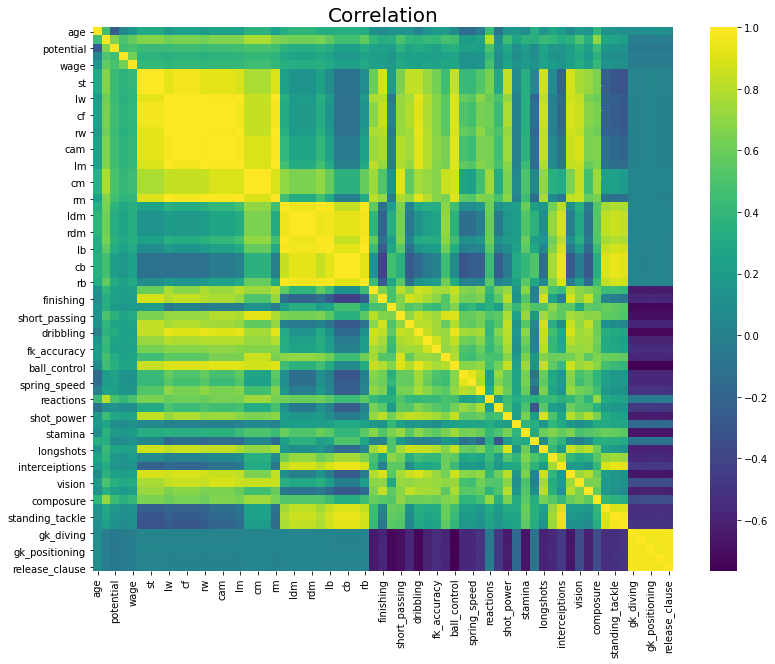

In [17]:
plt.figure(figsize=(13,10))
sns.heatmap(df_corr, cmap='viridis')
plt.title('Correlation', fontsize=20)
plt.show()

In [18]:
df_simple = df[['age', 'overall', 'potential', 'value', 'wage']]
df_simple

,age,overall,potential,value,wage
0,31,94,94,1105000000,565000
1,33,94,94,77000000,405000
2,26,92,93,1185000000,290000
3,27,91,93,72000000,260000
4,27,91,92,102000000,355000
...,...,...,...,...,...
18202,19,47,65,60000,1000
18203,19,47,63,60000,1000
18204,16,47,67,60000,1000
18205,17,47,66,60000,1000


In [19]:
df_simple_corr = df_simple.corr()
df_simple_corr

,age,overall,potential,value,wage
age,1.000000,0.455873,-0.251732,0.061423,0.144900
overall,0.455873,1.000000,0.660165,0.503339,0.576308
potential,-0.251732,0.660165,1.000000,0.460377,0.489097
value,0.061423,0.503339,0.460377,1.000000,0.622874
wage,0.144900,0.576308,0.489097,0.622874,1.000000


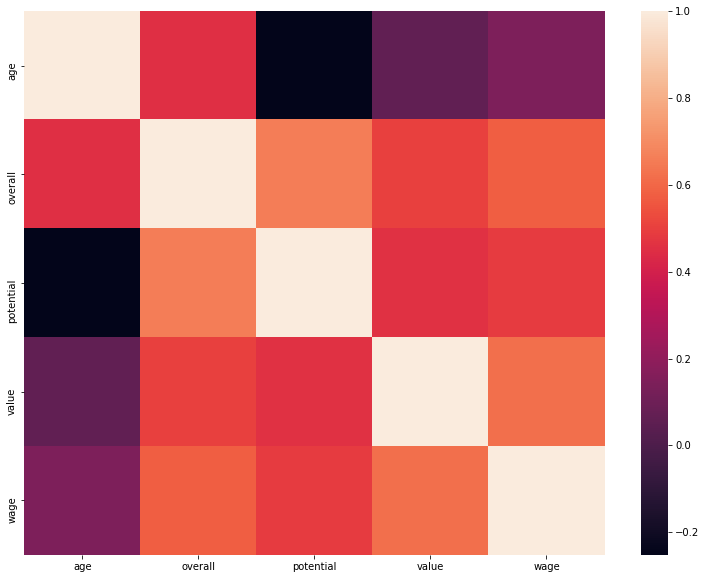

In [20]:
plt.figure(figsize=(13,10))
sns.heatmap(df_simple_corr)
plt.show()

# 2. EDA

## 1) Nationality

In [21]:
# df_nationality = df[['name', 'nationality']]
df_nationality_summary = df[['name', 'nationality']].groupby('nationality').agg({'name':'count'}).rename(columns={'name':'count'}).sort_values('count', ascending=False).reset_index()
df_nationality_summary.head()

,nationality,count
0,England,1660
1,Germany,1198
2,Spain,1072
3,Argentina,936
4,France,913


In [22]:
df_nationality_summary.head(50)

,nationality,count
0,England,1660
1,Germany,1198
2,Spain,1072
3,Argentina,936
4,France,913
5,Brazil,826
6,Italy,702
7,Colombia,617
8,Japan,475
9,Netherlands,453


In [23]:
df_nationality_summary.describe()

,count
count,163.000000
mean,110.153374
std,239.070721
min,1.000000
25%,3.000000
50%,14.000000
75%,76.500000
max,1660.000000


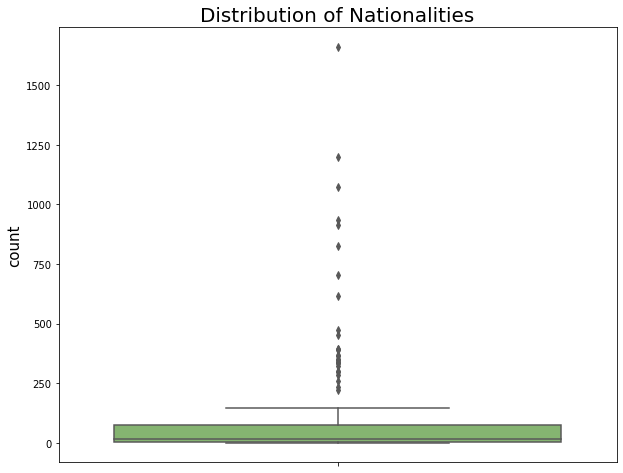

In [24]:
plt.figure(figsize=(10,8))
sns.boxplot(y='count', data=df_nationality_summary[df_nationality_summary.nationality!=''], palette='summer')
plt.title('Distribution of Nationalities', fontsize=20)
plt.ylabel('count', fontsize=15)
plt.show()

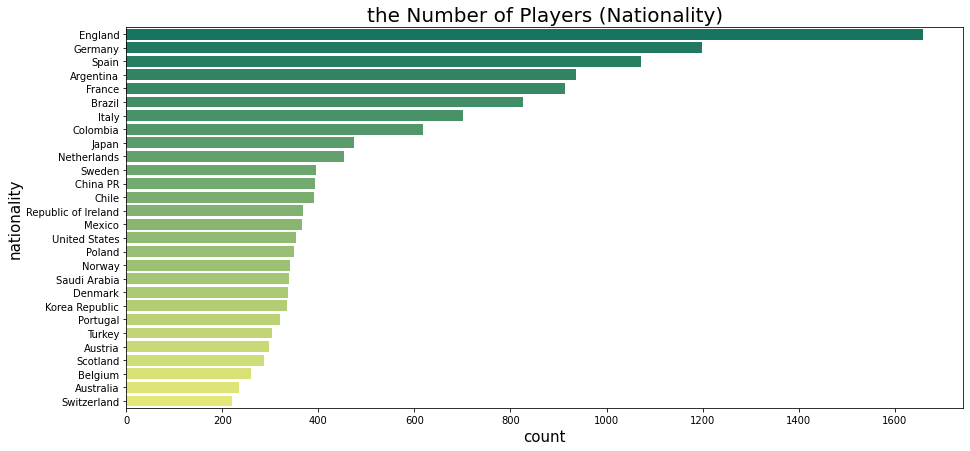

In [25]:
max_count = 28

plt.figure(figsize=(15,7))
sns.barplot(x='count', y='nationality', data=df_nationality_summary.iloc[:max_count], palette='summer')
plt.title('the Number of Players (Nationality)', fontsize=20)
plt.xlabel('count', fontsize=15)
plt.ylabel('nationality', fontsize=15)
plt.show()

## 2) Club

In [26]:
df_club_summary = df[['name', 'club']].groupby('club').agg({'name':'count'}).rename(columns={'name':'count'}).sort_values('count', ascending=False).reset_index()
df_club_summary.head()

,club,count
0,CD Leganés,33
1,Real Madrid,33
2,Empoli,33
3,Liverpool,33
4,Chelsea,33


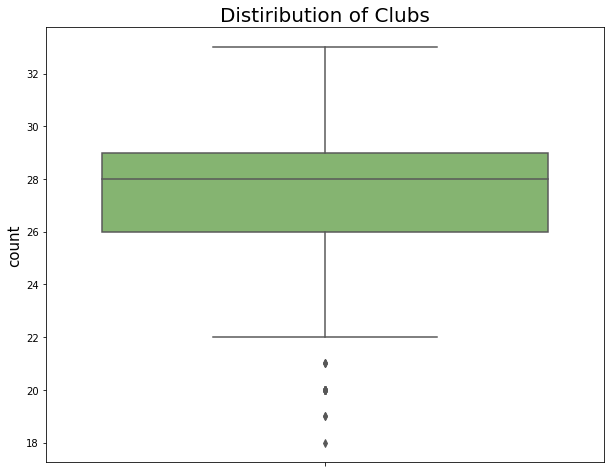

In [27]:
plt.figure(figsize=(10,8))
sns.boxplot(y='count', data=df_club_summary[df_club_summary.club!=''], palette='summer')
plt.title('Distiribution of Clubs', fontsize=20)
plt.ylabel('count', fontsize=15)
plt.show()

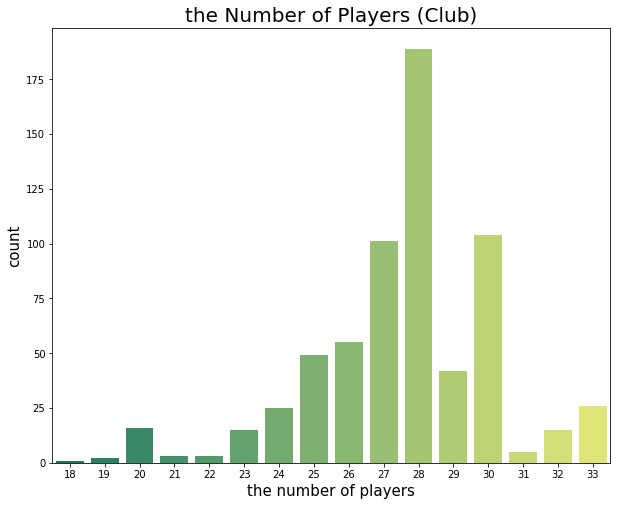

In [28]:
plt.figure(figsize=(10,8))
sns.countplot(x='count', data=df_club_summary[df_club_summary.club!=''], palette='summer')
plt.title('the Number of Players (Club)', fontsize=20)
plt.xlabel('the number of players', fontsize=15)
plt.ylabel('count', fontsize=15)
plt.show()

## 3) Value

In [29]:
# df_value = df_value[df_value.value != 0]

In [30]:
df_value = df[['name', 'value']]
df_value.describe()

,value
count,1.795500e+04
mean,1.382112e+07
std,4.012181e+07
min,1.000000e+04
25%,3.250000e+05
50%,7.000000e+05
75%,1.300000e+07
max,1.185000e+09


In [31]:
df_value

,name,value
0,L. Messi,1105000000
1,Cristiano Ronaldo,77000000
2,Neymar Jr,1185000000
3,De Gea,72000000
4,K. De Bruyne,102000000
...,...,...
18202,J. Lundstram,60000
18203,N. Christoffersson,60000
18204,B. Worman,60000
18205,D. Walker-Rice,60000


### - Value & Level

In [32]:
def value_tagger(value):
    if value <= 60000000:
        return 'poor'
    elif value <= 600000000 :
        return 'intermediate'
    else:
        return 'expensive'

df_value['tag'] = df_value.loc[:,'value'].apply(value_tagger)
df_value.head(30)

/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,name,value,tag
0,L. Messi,1105000000,expensive
1,Cristiano Ronaldo,77000000,intermediate
2,Neymar Jr,1185000000,expensive
3,De Gea,72000000,intermediate
4,K. De Bruyne,102000000,intermediate
5,E. Hazard,93000000,intermediate
6,L. Modrić,67000000,intermediate
7,L. Suárez,80000000,intermediate
8,Sergio Ramos,51000000,poor
9,J. Oblak,68000000,intermediate


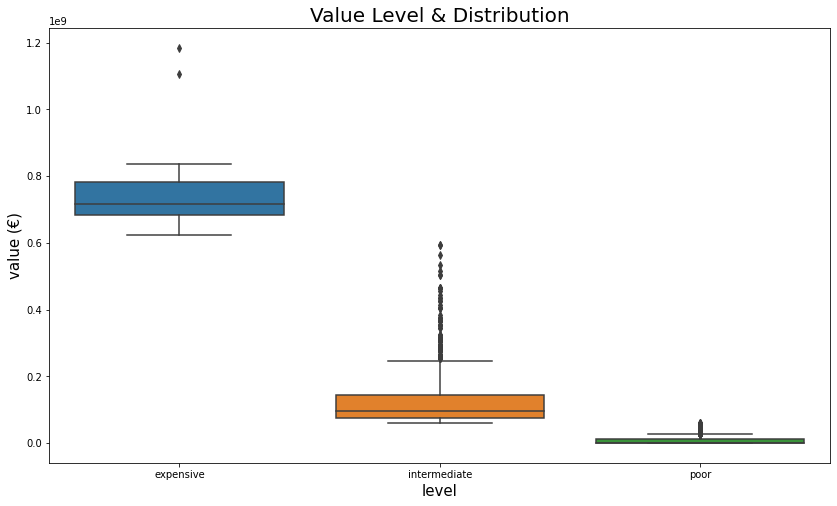

In [33]:
order_list = ['expensive', 'intermediate', 'poor']
plt.figure(figsize=(14, 8))
sns.boxplot(x='tag', y='value', data=df_value, order=order_list)
plt.title('Value Level & Distribution', fontsize=20)
plt.xlabel('level', fontsize=15)
plt.ylabel('value (€)', fontsize=15)
plt.show()

In [34]:
df_value_p = df[['name', 'value']]
df_value_p

,name,value
0,L. Messi,1105000000
1,Cristiano Ronaldo,77000000
2,Neymar Jr,1185000000
3,De Gea,72000000
4,K. De Bruyne,102000000
...,...,...
18202,J. Lundstram,60000
18203,N. Christoffersson,60000
18204,B. Worman,60000
18205,D. Walker-Rice,60000


### - Value top10 Players

In [35]:
df_value_p_top10 = df_value_p.iloc[:10]
df_value_p_top10

,name,value
0,L. Messi,1105000000
1,Cristiano Ronaldo,77000000
2,Neymar Jr,1185000000
3,De Gea,72000000
4,K. De Bruyne,102000000
5,E. Hazard,93000000
6,L. Modrić,67000000
7,L. Suárez,80000000
8,Sergio Ramos,51000000
9,J. Oblak,68000000


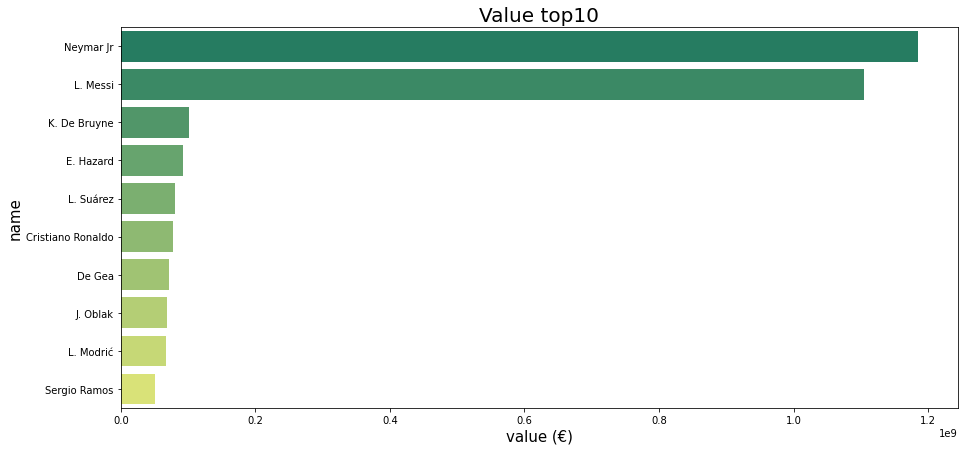

In [36]:
plt.figure(figsize=(15,7))
sns.barplot(y='name',x='value',data=df_value_p_top10.sort_values(by='value', ascending=False), palette='summer')
plt.title('Value top10', fontsize=20)
plt.xlabel('value (€)', fontsize=15)
plt.ylabel('name', fontsize=15)
plt.show()

## 4) Wage

In [37]:
# df_wage = df_wage[df_wage.wage != 0]

In [38]:
df_wage = df[['name', 'wage', 'overall']]
df_wage

,name,wage,overall
0,L. Messi,565000,94
1,Cristiano Ronaldo,405000,94
2,Neymar Jr,290000,92
3,De Gea,260000,91
4,K. De Bruyne,355000,91
...,...,...,...
18202,J. Lundstram,1000,47
18203,N. Christoffersson,1000,47
18204,B. Worman,1000,47
18205,D. Walker-Rice,1000,47


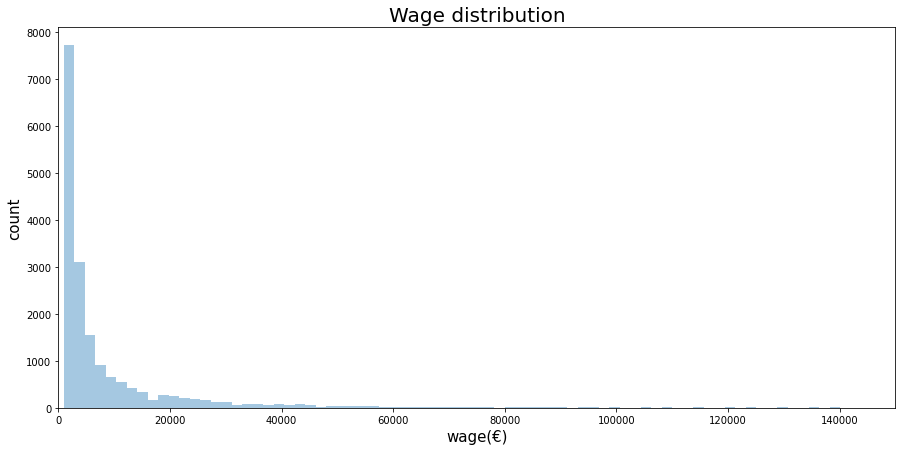

In [39]:
plt.figure(figsize=(15,7))
sns.distplot(df_wage['wage'], kde=False, bins=300)
plt.xlim(0, 150000)
plt.title('Wage distribution', fontsize=20)
plt.xlabel('wage(€)', fontsize=15)
plt.ylabel('count', fontsize=15)
plt.show()

### - Wage & Overall

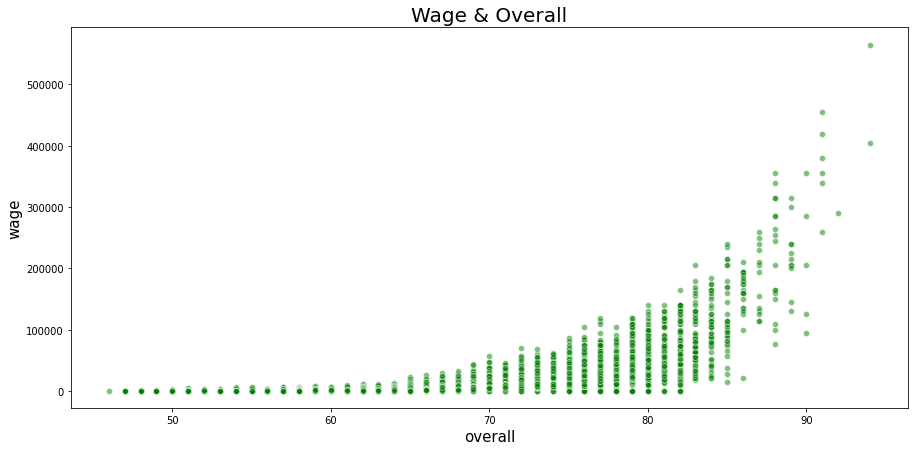

In [40]:
plt.figure(figsize=(15,7))
sns.scatterplot(y='wage', x='overall', data=df_wage, color='green', alpha=0.5)
plt.title('Wage & Overall', fontsize=20)
plt.xlabel('overall', fontsize=15)
plt.ylabel('wage', fontsize=15)
plt.show()

### - Wage & Level

In [41]:
def wage_tagger(value):
    if value <= 150000:
        return 'poor'
    elif value <= 300000:
        return 'intermediate'
    else:
        return 'expensive'

df_wage['tag'] = df_wage.loc[:,'wage'].apply(wage_tagger)
df_wage.head()

/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,name,wage,overall,tag
0,L. Messi,565000,94,expensive
1,Cristiano Ronaldo,405000,94,expensive
2,Neymar Jr,290000,92,intermediate
3,De Gea,260000,91,intermediate
4,K. De Bruyne,355000,91,expensive


In [42]:
df_wage.describe()

,wage,overall
count,17955.000000,17955.000000
mean,9865.831245,66.228237
std,22123.139872,6.921015
min,1000.000000,46.000000
25%,1000.000000,62.000000
50%,3000.000000,66.000000
75%,9000.000000,71.000000
max,565000.000000,94.000000


### - Wage top 10 Players

In [44]:
df_wage_p = df[['name', 'wage']]
df_wage_p

,name,wage
0,L. Messi,565000
1,Cristiano Ronaldo,405000
2,Neymar Jr,290000
3,De Gea,260000
4,K. De Bruyne,355000
...,...,...
18202,J. Lundstram,1000
18203,N. Christoffersson,1000
18204,B. Worman,1000
18205,D. Walker-Rice,1000


In [45]:
df_wage_p_top10 = df_wage_p.iloc[:10]
df_wage_p_top10

,name,wage
0,L. Messi,565000
1,Cristiano Ronaldo,405000
2,Neymar Jr,290000
3,De Gea,260000
4,K. De Bruyne,355000
5,E. Hazard,340000
6,L. Modrić,420000
7,L. Suárez,455000
8,Sergio Ramos,380000
9,J. Oblak,94000


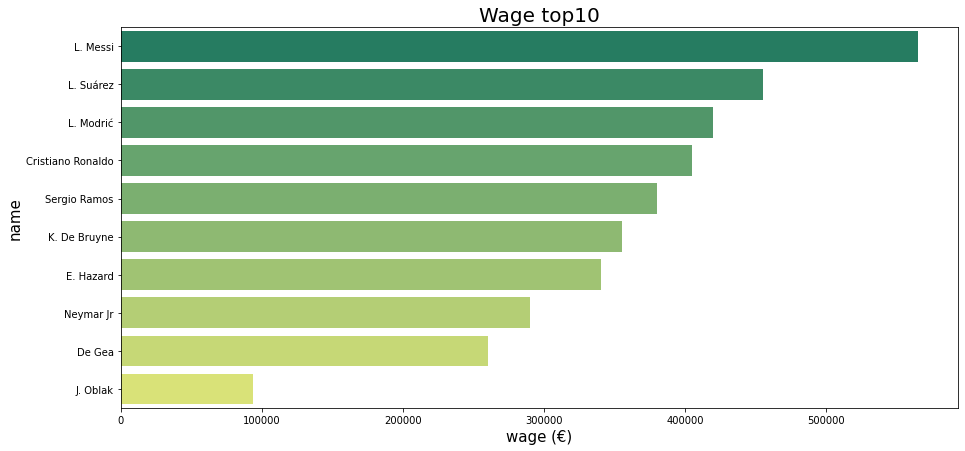

In [46]:
plt.figure(figsize=(15,7))
sns.barplot(y='name',x='wage',data=df_wage_p_top10.sort_values(by='wage', ascending=False), palette='summer')
plt.title('Wage top10', fontsize=20)
plt.xlabel('wage (€)', fontsize=15)
plt.ylabel('name', fontsize=15)
plt.show()

### - Value & Annual Salary (wage * 52)

In [47]:
df_value_wage_p = pd.merge(df_value_p_top10, df_wage_p_top10, on='name', how='outer')
df_value_wage_p['annual_salary'] = df_value_wage_p['wage']*52
df_value_wage_p

,name,value,wage,annual_salary
0,L. Messi,1105000000,565000,29380000
1,Cristiano Ronaldo,77000000,405000,21060000
2,Neymar Jr,1185000000,290000,15080000
3,De Gea,72000000,260000,13520000
4,K. De Bruyne,102000000,355000,18460000
5,E. Hazard,93000000,340000,17680000
6,L. Modrić,67000000,420000,21840000
7,L. Suárez,80000000,455000,23660000
8,Sergio Ramos,51000000,380000,19760000
9,J. Oblak,68000000,94000,4888000


<Figure size 1080x504 with 0 Axes>

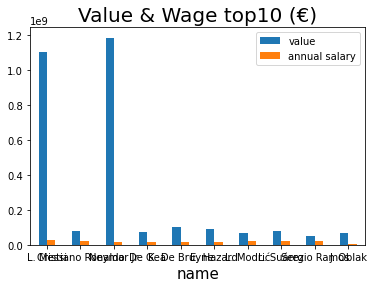

In [48]:
plt.figure(figsize=(15,7))
df_value_wage_p.plot(x='name', y=['value', 'annual_salary'], kind="bar", grid=False)
plt.xticks(rotation=0)
plt.title('Value & Wage top10 (€)', fontsize=20)
plt.xlabel('name', fontsize=15)
plt.ylabel('')
plt.legend(['value', 'annual salary'])
plt.show()

## 5) Position

In [49]:
df_position = df[['name', 'age', 'position','value', 'wage']]
df_position

,name,age,position,value,wage
0,L. Messi,31,RF,1105000000,565000
1,Cristiano Ronaldo,33,ST,77000000,405000
2,Neymar Jr,26,LW,1185000000,290000
3,De Gea,27,GK,72000000,260000
4,K. De Bruyne,27,RCM,102000000,355000
...,...,...,...,...,...
18202,J. Lundstram,19,CM,60000,1000
18203,N. Christoffersson,19,ST,60000,1000
18204,B. Worman,16,ST,60000,1000
18205,D. Walker-Rice,17,RW,60000,1000


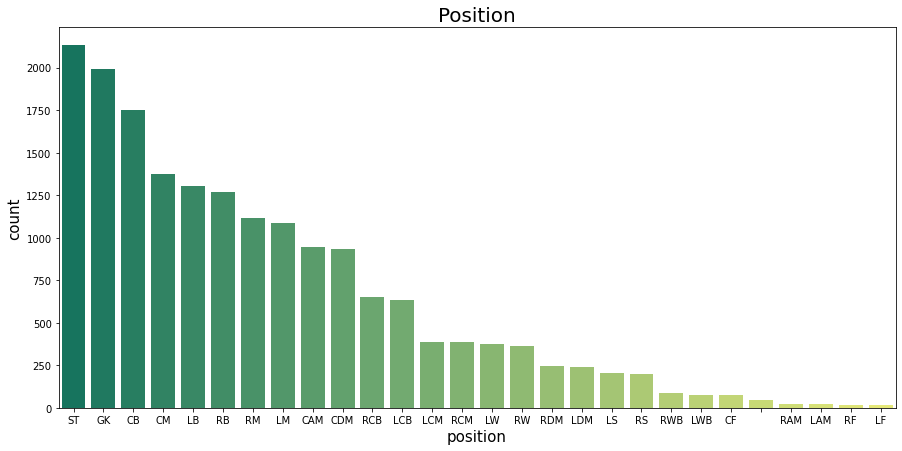

In [50]:
plt.figure(figsize=(15,7))
count_position = sns.countplot(x = 'position', data = df_position, order = df_position['position'].value_counts().index, palette='summer')
plt.title('Position', fontsize=20)
plt.xlabel('position', fontsize=15)
plt.ylabel('count', fontsize=15)
plt.show()

In [51]:
df_position.describe()

,age,value,wage
count,17955.000000,1.795500e+04,17955.000000
mean,25.095349,1.382112e+07,9865.831245
std,4.659778,4.012181e+07,22123.139872
min,16.000000,1.000000e+04,1000.000000
25%,21.000000,3.250000e+05,1000.000000
50%,25.000000,7.000000e+05,3000.000000
75%,28.000000,1.300000e+07,9000.000000
max,45.000000,1.185000e+09,565000.000000


In [52]:
df_position.groupby('position').mean()

,age,value,wage
position,,,
,25.000000,3.543750e+05,1687.500000
CAM,24.530655,1.658350e+07,10349.894292
CB,24.787550,8.925180e+06,7812.107367
CDM,25.209402,1.194863e+07,9434.829060
CF,23.513514,2.128378e+07,10216.216216
CM,23.466231,1.105805e+07,8443.718228
GK,25.991956,8.151169e+06,6925.590749
LAM,29.333333,5.637976e+07,26142.857143
LB,25.065951,1.014638e+07,8845.092025


### - Position & Value

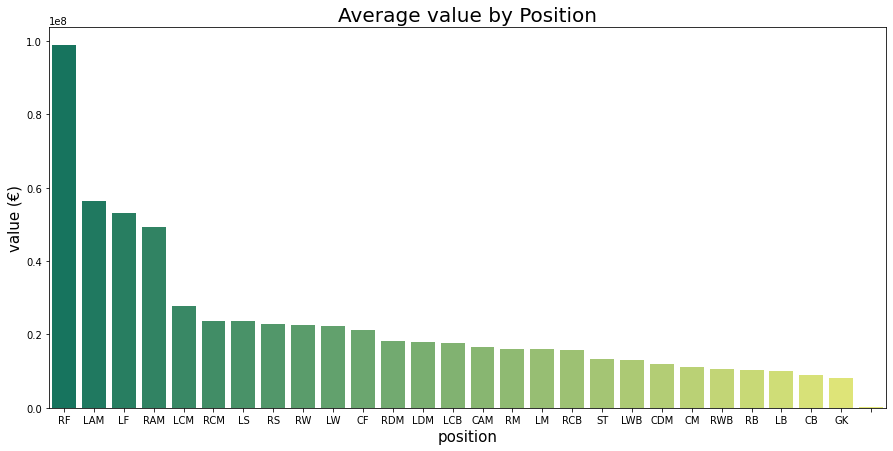

In [53]:
# position & value
plt.figure(figsize=(15,7))
order_list = df_position.groupby('position').agg({'value':'mean'}).sort_values('value', ascending=False).index

sns.barplot(x='position', y='value', data=df_position, ci=None, order=order_list, palette='summer')
plt.title('Average value by Position', fontsize=20)
plt.xlabel('position', fontsize=15)
plt.ylabel('value (€)', fontsize=15)
plt.show()

### - Position & Wage

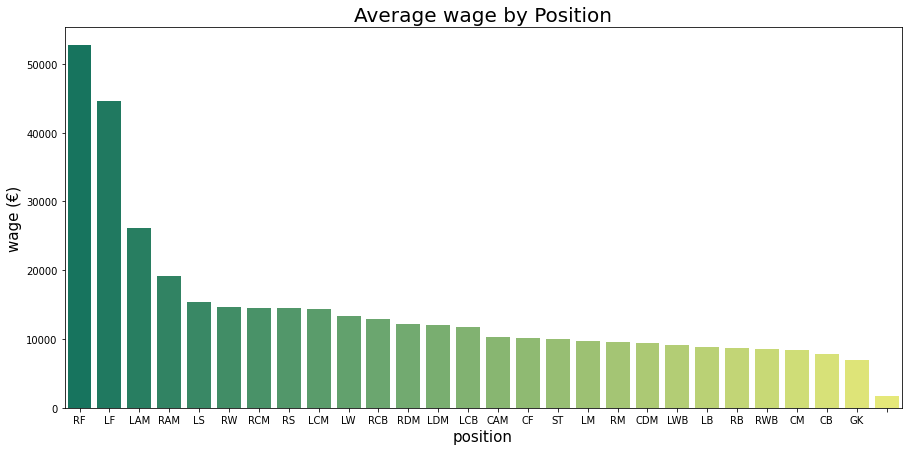

In [54]:
# position & wage
plt.figure(figsize=(15,7))
order_list = df_position.groupby('position').agg({'wage':'mean'}).sort_values('wage', ascending=False).index

sns.barplot(x='position', y='wage', data=df_position, ci=None, order=order_list, palette='summer')
plt.title('Average wage by Position', fontsize=20)
plt.xlabel('position', fontsize=15)
plt.ylabel('wage (€)', fontsize=15)
plt.show()

### - Position & Age

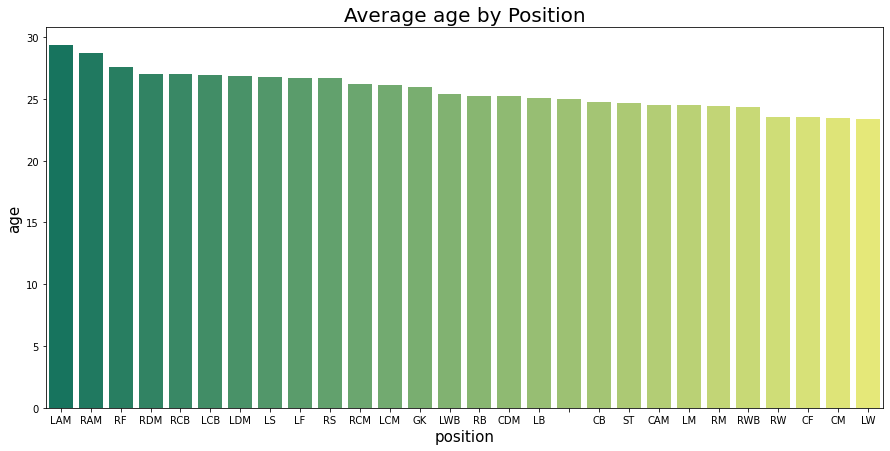

In [55]:
# position & age
plt.figure(figsize=(15,7))
order_list = df_position.groupby('position').agg({'age':'mean'}).sort_values('age', ascending=False).index

sns.barplot(x='position', y='age', data=df_position, ci=None, order=order_list, palette='summer')
plt.title('Average age by Position', fontsize=20)
plt.xlabel('position', fontsize=15)
plt.ylabel('age', fontsize=15)
plt.show()

## 6) Age

In [56]:
df_age = df[['name', 'age', 'potential', 'work_rate', 'overall']]
df_age

,name,age,potential,work_rate,overall
0,L. Messi,31,94,Medium/ Medium,94
1,Cristiano Ronaldo,33,94,High/ Low,94
2,Neymar Jr,26,93,High/ Medium,92
3,De Gea,27,93,Medium/ Medium,91
4,K. De Bruyne,27,92,High/ High,91
...,...,...,...,...,...
18202,J. Lundstram,19,65,Medium/ Medium,47
18203,N. Christoffersson,19,63,Medium/ Medium,47
18204,B. Worman,16,67,Medium/ Medium,47
18205,D. Walker-Rice,17,66,Medium/ Medium,47


In [57]:
df_age.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17955 entries, 0 to 18206
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       17955 non-null  object
 1   age        17955 non-null  int64 
 2   potential  17955 non-null  int64 
 3   work_rate  17955 non-null  object
 4   overall    17955 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1.4+ MB


In [58]:
df_age.describe()

,age,potential,overall
count,17955.000000,17955.000000,17955.000000
mean,25.095349,71.323197,66.228237
std,4.659778,6.139378,6.921015
min,16.000000,48.000000,46.000000
25%,21.000000,67.000000,62.000000
50%,25.000000,71.000000,66.000000
75%,28.000000,75.000000,71.000000
max,45.000000,95.000000,94.000000


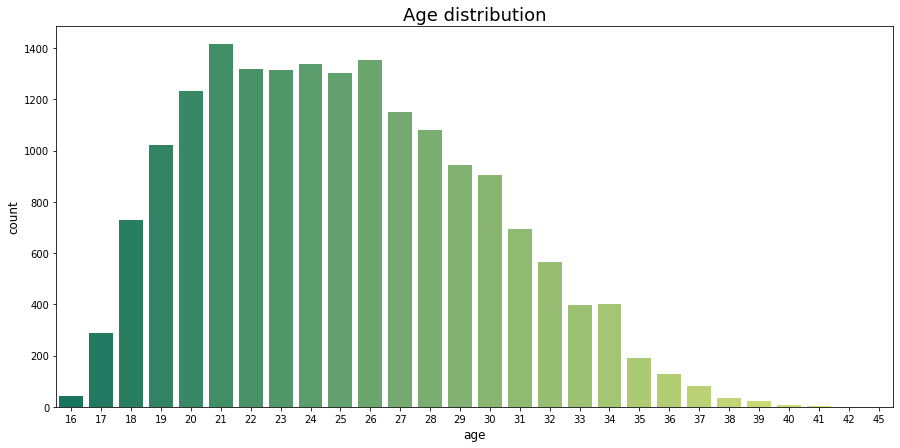

In [59]:
# 나이 분포
plt.figure(figsize=(15,7))
sns.countplot(x='age', data=df_age, palette='summer')
plt.title('Age distribution', fontsize=18)
plt.xlabel('age', fontsize=12)
plt.ylabel('count', fontsize=12)
plt.show()

### - Corr between Age & Potential

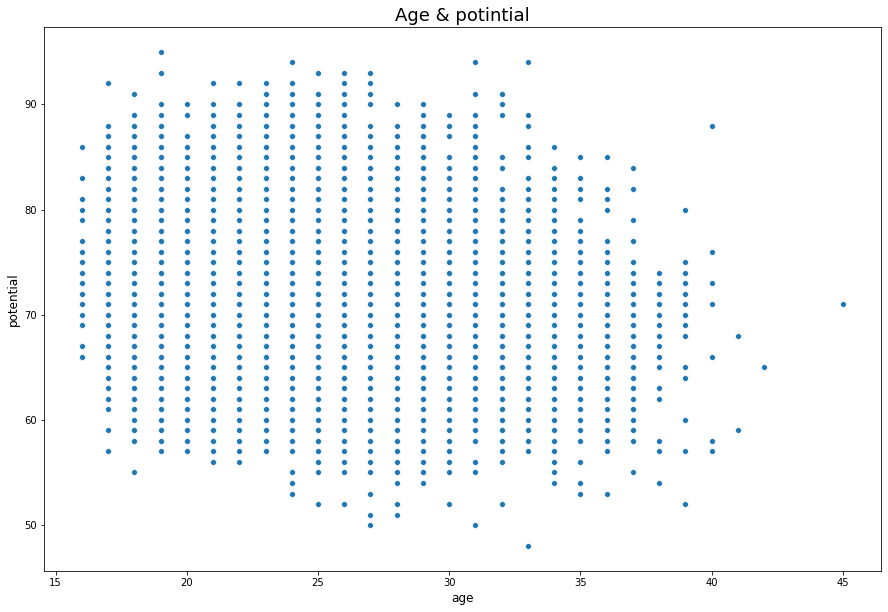

In [60]:
# age & potential
plt.figure(figsize=(15,10))
sns.scatterplot(x='age', y='potential',data=df_age)
plt.title('Age & potintial', fontsize=18)
plt.xlabel('age', fontsize=12)
plt.ylabel('potential', fontsize=12)
plt.show()

In [61]:
df_age_corr = df_age[['age', 'potential']].corr()
df_age_corr

,age,potential
age,1.000000,-0.251732
potential,-0.251732,1.000000


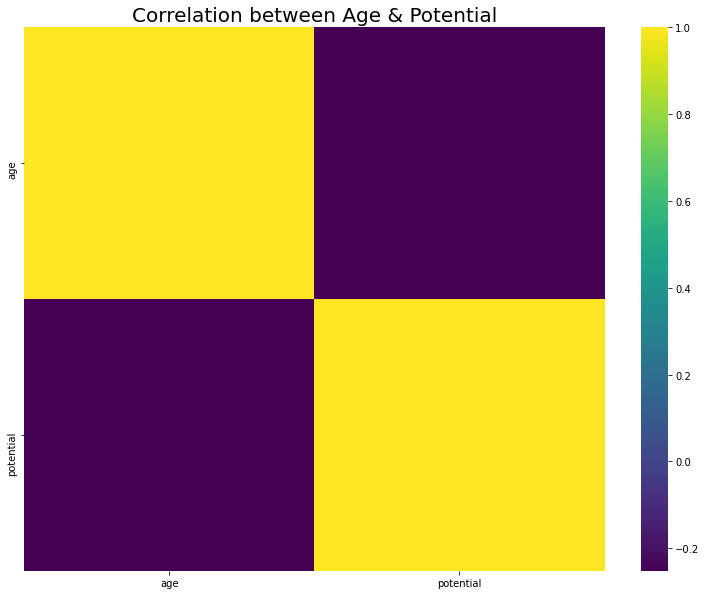

In [62]:
plt.figure(figsize=(13,10))
sns.heatmap(df_age_corr, cmap='viridis')
plt.title('Correlation between Age & Potential', fontsize=20)
plt.show()

### - Age & Value

In [63]:
df_age_value = df[['age', 'value']]
df_age_value

,age,value
0,31,1105000000
1,33,77000000
2,26,1185000000
3,27,72000000
4,27,102000000
...,...,...
18202,19,60000
18203,19,60000
18204,16,60000
18205,17,60000


In [64]:
df_age_value.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17955 entries, 0 to 18206
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     17955 non-null  int64
 1   value   17955 non-null  int64
dtypes: int64(2)
memory usage: 1.0 MB


<Figure size 1080x1080 with 0 Axes>

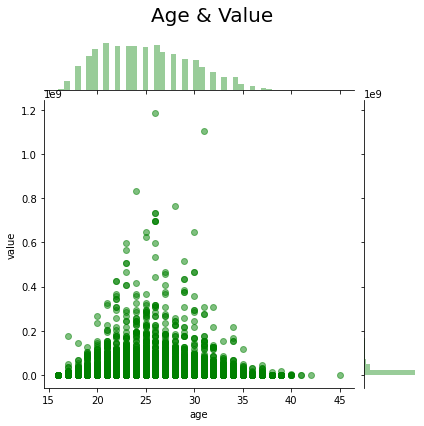

In [65]:
plt.figure(figsize=(15,15))
sns.jointplot(x='age', y='value', data=df_age_value, color='green', alpha=0.5)
plt.subplots_adjust(top=0.9)
plt.suptitle('Age & Value', fontsize = 20)
#plt.title('Age & Value', position=(-3, 0), fontsize=20)
plt.show()

### - Age & Wage

In [66]:
df_age_wage = df[['age', 'wage']]
df_age_wage

,age,wage
0,31,565000
1,33,405000
2,26,290000
3,27,260000
4,27,355000
...,...,...
18202,19,1000
18203,19,1000
18204,16,1000
18205,17,1000


In [67]:
df_age_wage.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17955 entries, 0 to 18206
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     17955 non-null  int64
 1   wage    17955 non-null  int64
dtypes: int64(2)
memory usage: 1.0 MB


<Figure size 2160x2160 with 0 Axes>

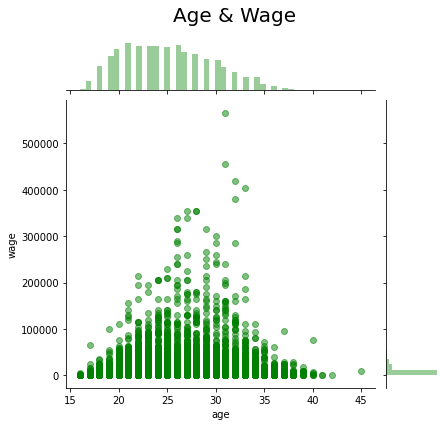

In [68]:
plt.figure(figsize=(30, 30))
sns.jointplot(x='age', y='wage', data=df_age_wage, color='green', alpha=0.5)
plt.subplots_adjust(top=0.9)
plt.suptitle('Age & Wage', fontsize = 20)
plt.show()

## 7) Potential

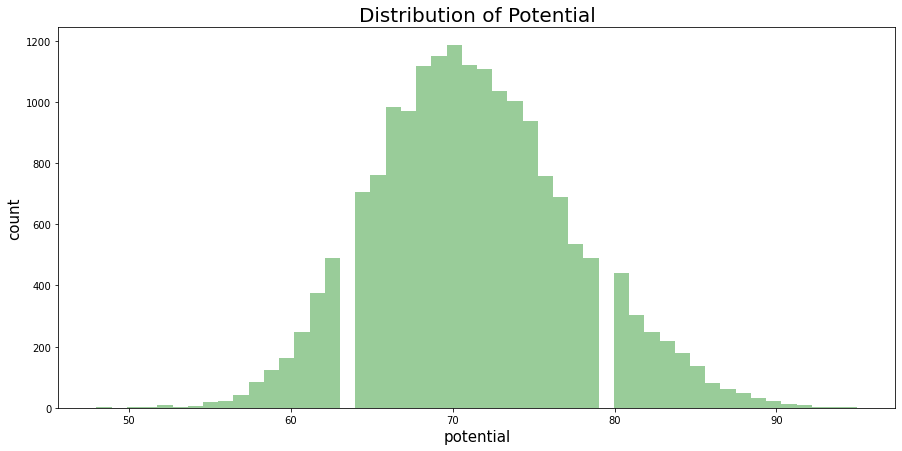

In [69]:
# potential histogram
plt.figure(figsize=(15, 7))
sns.distplot(df_age['potential'], kde=False, color='green')
plt.title('Distribution of Potential', fontsize=20)
plt.xlabel('potential', fontsize=15)
plt.ylabel('count', fontsize=15)
plt.show()

### - Potential & Overall

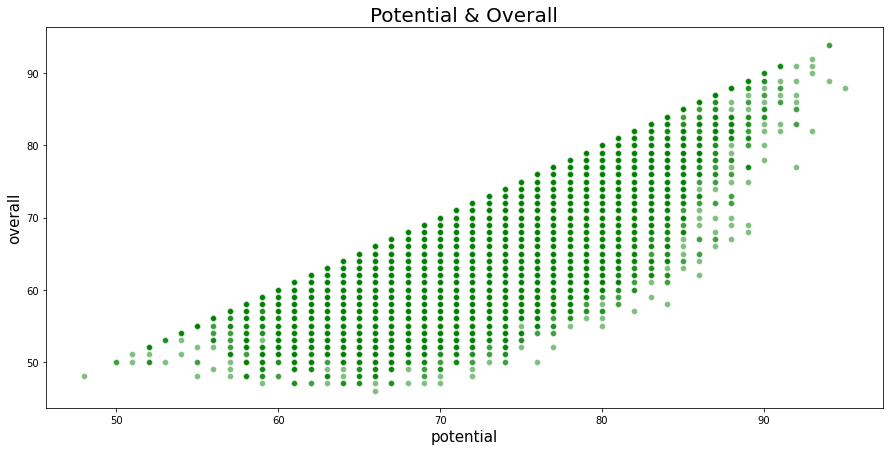

In [70]:
plt.figure(figsize=(15,7))
sns.scatterplot(x='potential', y='overall', data=df_age[['potential', 'overall']], color='green', alpha=0.5)
plt.title('Potential & Overall', fontsize=20)
plt.xlabel('potential', fontsize=15)
plt.ylabel('overall', fontsize=15)
plt.show()

## 8) Preferred foot

In [71]:
df_foot = df[['name', 'preferred_foot']]
df_foot

,name,preferred_foot
0,L. Messi,Left
1,Cristiano Ronaldo,Right
2,Neymar Jr,Right
3,De Gea,Right
4,K. De Bruyne,Right
...,...,...
18202,J. Lundstram,Right
18203,N. Christoffersson,Right
18204,B. Worman,Right
18205,D. Walker-Rice,Right


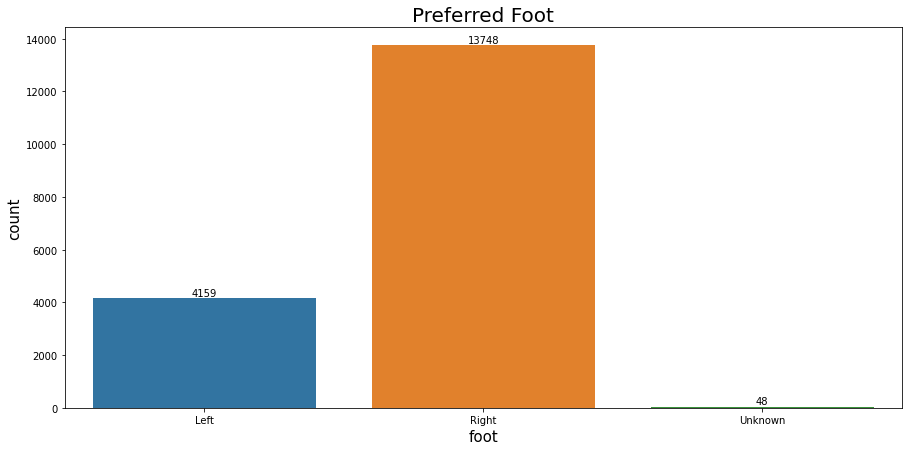

In [72]:
plt.figure(figsize=(15,7))
count = sns.countplot(x = 'preferred_foot', data = df_foot)
for p in count.patches:
    count.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
plt.title('Preferred Foot', fontsize=20)
count.set_xticklabels(['Left', 'Right', 'Unknown'])
plt.xlabel('foot', fontsize=15)
plt.ylabel('count', fontsize=15)
plt.show()

## 9) Body type

In [73]:
df_body = df[['name', 'body_type']]
df_body

,name,body_type
0,L. Messi,Messi
1,Cristiano Ronaldo,C. Ronaldo
2,Neymar Jr,Neymar
3,De Gea,Lean
4,K. De Bruyne,Normal
...,...,...
18202,J. Lundstram,Lean
18203,N. Christoffersson,Normal
18204,B. Worman,Normal
18205,D. Walker-Rice,Lean


In [74]:
df_body_summary = df[['name', 'body_type']].groupby('body_type').agg({'name':'count'}).rename(columns={'name':'count'}).sort_values('count', ascending=False).reset_index()
df_body_summary

,body_type,count
0,Normal,10428
1,Lean,6349
2,Stocky,1123
3,,48
4,Akinfenwa,1
5,C. Ronaldo,1
6,Courtois,1
7,Messi,1
8,Neymar,1
9,PLAYER_BODY_TYPE_25,1


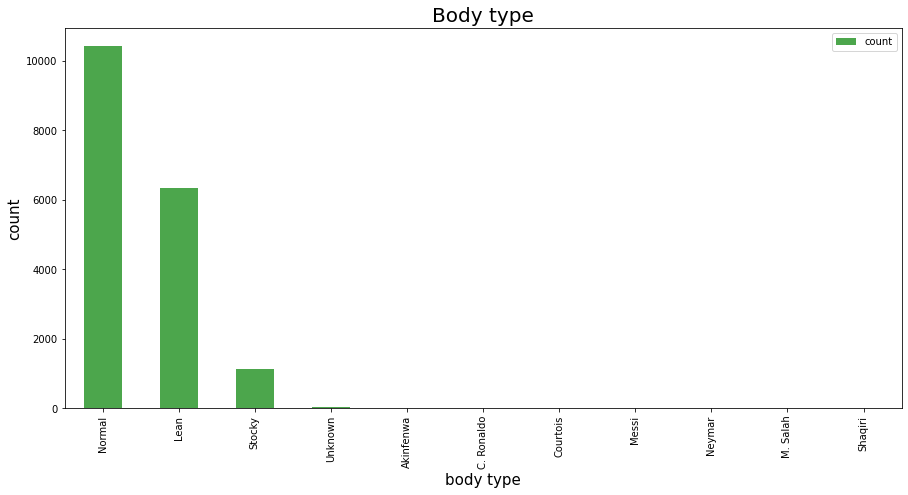

In [75]:
plt.rcParams["figure.figsize"] = (15,7)
body_summary = df_body_summary.plot(kind='bar', color='green', alpha=0.7)
body_summary.set_xticklabels(['Normal', 'Lean', 'Stocky', 'Unknown', 'Akinfenwa', 'C. Ronaldo', 'Courtois', 'Messi', 'Neymar', 'M. Salah', 'Shaqiri'])
plt.title('Body type', fontsize=20)
plt.xlabel('body type', fontsize=15)
plt.ylabel('count', fontsize=15)
plt.show()

In [76]:
df_body_type = df_body_summary.iloc[:4]
df_body_type

,body_type,count
0,Normal,10428
1,Lean,6349
2,Stocky,1123
3,,48


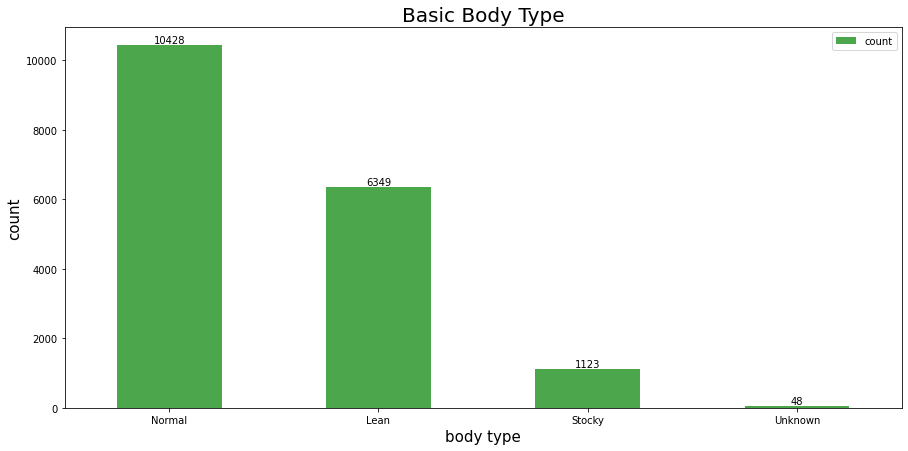

In [77]:
plt.rcParams["figure.figsize"] = (15,7)
body_count4 = df_body_type.plot(kind='bar', color='green', alpha=0.7)
body_count4.set_xticklabels(['Normal', 'Lean', 'Stocky', 'Unknown'], rotation=0)
for p in body_count4.patches:
    body_count4.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
plt.title('Basic Body Type', fontsize=20)
plt.xlabel('body type', fontsize=15)
plt.ylabel('count', fontsize=15)
plt.show()

## 10) Stats

In [78]:
df_score = df.loc[:, 'ls':]
df_score

,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,fk_accuracy,long_passing,ball_control,acceleration,spring_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,longshots,aggression,interceiptions,positioning,vision,penalties,composure,marking,standing_tackle,slideing_tackle,gk_diving,gk_kicking,gk_positioning,gk_reflees,release_clause
0,88.0,88.0,88.0,92.0,93.0,93.0,93.0,92.0,93.0,93.0,93.0,91.0,84.0,84.0,84.0,91.0,64.0,61.0,61.0,61.0,64.0,59.0,47.0,47.0,47.0,59.0,84,95,70,90,86,97,93,94,87,96,91,86,91,95,95,85,68,72,59,94,48,22,94,94,75,96,33,28,26,6,11,15,14,8
1,91.0,91.0,91.0,89.0,90.0,90.0,90.0,89.0,88.0,88.0,88.0,88.0,81.0,81.0,81.0,88.0,65.0,61.0,61.0,61.0,65.0,61.0,53.0,53.0,53.0,61.0,84,94,89,81,87,88,81,76,77,94,89,91,87,96,70,95,95,88,79,93,63,29,95,82,85,95,28,31,23,7,11,15,14,11
2,84.0,84.0,84.0,89.0,89.0,89.0,89.0,89.0,89.0,89.0,89.0,88.0,81.0,81.0,81.0,88.0,65.0,60.0,60.0,60.0,65.0,60.0,47.0,47.0,47.0,60.0,79,87,62,84,84,96,88,87,78,95,94,90,96,94,84,80,61,81,49,82,56,36,89,87,81,94,27,24,33,9,9,15,15,11
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17,13,21,50,13,18,21,19,51,42,57,58,60,90,43,31,67,43,64,12,38,30,12,68,40,68,15,21,13,90,85,87,88,94
4,82.0,82.0,82.0,87.0,87.0,87.0,87.0,87.0,88.0,88.0,88.0,88.0,87.0,87.0,87.0,88.0,77.0,77.0,77.0,77.0,77.0,73.0,66.0,66.0,66.0,73.0,93,82,55,92,82,86,85,83,91,91,78,76,79,91,77,91,63,90,75,91,76,61,87,94,79,88,68,58,51,15,13,5,10,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,42.0,42.0,42.0,44.0,44.0,44.0,44.0,44.0,45.0,45.0,45.0,44.0,45.0,45.0,45.0,44.0,44.0,45.0,45.0,45.0,44.0,45.0,45.0,45.0,45.0,45.0,34,38,40,49,25,42,30,34,45,43,54,57,60,49,76,43,55,40,47,38,46,46,39,52,43,45,40,48,47,10,13,7,8,9
18203,45.0,45.0,45.0,39.0,42.0,42.0,42.0,39.0,40.0,40.0,40.0,38.0,35.0,35.0,35.0,38.0,30.0,31.0,31.0,31.0,30.0,29.0,32.0,32.0,32.0,29.0,23,52,52,43,36,39,32,20,25,40,41,39,38,40,52,41,47,43,67,42,47,16,46,33,43,42,22,15,19,10,9,9,5,12
18204,45.0,45.0,45.0,45.0,46.0,46.0,46.0,45.0,44.0,44.0,44.0,44.0,38.0,38.0,38.0,44.0,34.0,30.0,30.0,30.0,34.0,33.0,28.0,28.0,28.0,33.0,25,40,46,38,38,45,38,27,28,44,70,69,50,47,58,45,60,55,32,45,32,15,48,43,55,41,32,13,11,6,5,10,6,13
18205,47.0,47.0,47.0,47.0,46.0,46.0,46.0,47.0,45.0,45.0,45.0,46.0,39.0,39.0,39.0,46.0,36.0,32.0,32.0,32.0,36.0,35.0,31.0,31.0,31.0,35.0,44,50,39,42,40,51,34,32,32,52,61,60,52,21,71,64,42,40,48,34,33,22,44,47,50,46,20,25,27,14,6,14,8,9


In [79]:
df_info = df[['name', 'overall', 'potential']]
df_info

,name,overall,potential
0,L. Messi,94,94
1,Cristiano Ronaldo,94,94
2,Neymar Jr,92,93
3,De Gea,91,93
4,K. De Bruyne,91,92
...,...,...,...
18202,J. Lundstram,47,65
18203,N. Christoffersson,47,63
18204,B. Worman,47,67
18205,D. Walker-Rice,47,66


In [80]:
df_info['mean'] = (df_info['overall'] + df_info['potential'])/2
df_info

/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,name,overall,potential,mean
0,L. Messi,94,94,94.0
1,Cristiano Ronaldo,94,94,94.0
2,Neymar Jr,92,93,92.5
3,De Gea,91,93,92.0
4,K. De Bruyne,91,92,91.5
...,...,...,...,...
18202,J. Lundstram,47,65,56.0
18203,N. Christoffersson,47,63,55.0
18204,B. Worman,47,67,57.0
18205,D. Walker-Rice,47,66,56.5


### - Potential & Overall

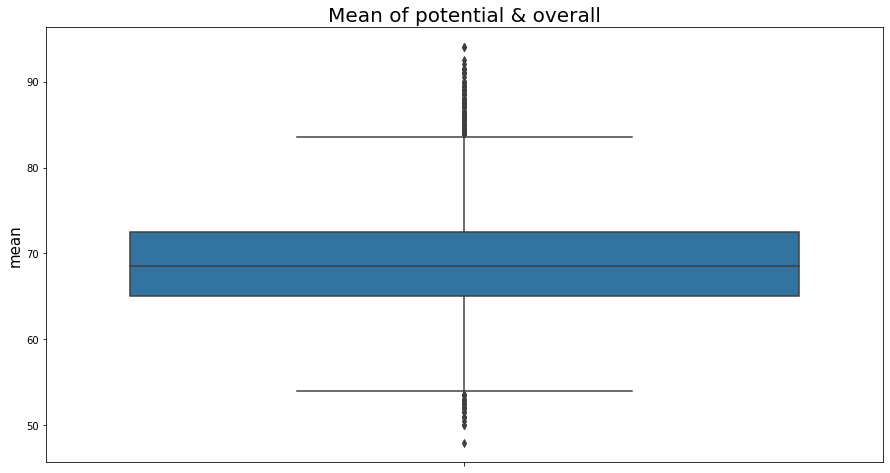

In [81]:
plt.figure(figsize=(15,8))
sns.boxplot(y='mean', data=df_info)
plt.title('Mean of potential & overall', fontsize=20)
plt.ylabel('mean', fontsize=15)
plt.show()

In [82]:
def mean_tagger(value):
    if value <= 65:
        return 'low'
    elif value <= 72:
        return 'moderate'
    else:
        return 'high'

df_info['tag'] = df_info.loc[:,'mean'].apply(mean_tagger)
df_info.head()

/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,name,overall,potential,mean,tag
0,L. Messi,94,94,94.0,high
1,Cristiano Ronaldo,94,94,94.0,high
2,Neymar Jr,92,93,92.5,high
3,De Gea,91,93,92.0,high
4,K. De Bruyne,91,92,91.5,high


In [83]:
df_info.describe()

,overall,potential,mean
count,17955.000000,17955.000000,17955.000000
mean,66.228237,71.323197,68.775717
std,6.921015,6.139378,5.951768
min,46.000000,48.000000,48.000000
25%,62.000000,67.000000,65.000000
50%,66.000000,71.000000,68.500000
75%,71.000000,75.000000,72.500000
max,94.000000,95.000000,94.000000


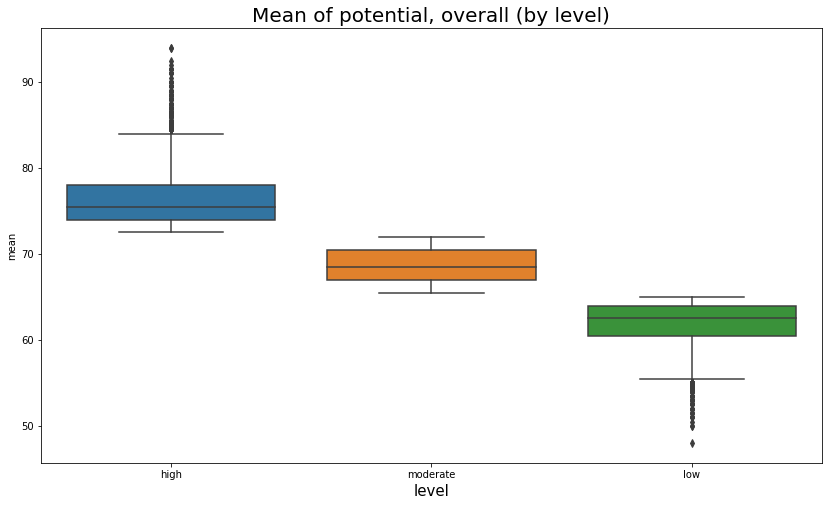

In [84]:
order_list = ['high', 'moderate', 'low']
plt.figure(figsize=(14, 8))
sns.boxplot(x='tag', y='mean', data=df_info, order=order_list)
plt.title('Mean of potential, overall (by level)', fontsize=20)
plt.xlabel('level', fontsize=15)
plt.show()

### - Position

In [85]:
df_stat = pd.concat([df_info, df_score], axis=1)
df_stat

,name,overall,potential,mean,tag,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,fk_accuracy,long_passing,ball_control,acceleration,spring_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,longshots,aggression,interceiptions,positioning,vision,penalties,composure,marking,standing_tackle,slideing_tackle,gk_diving,gk_kicking,gk_positioning,gk_reflees,release_clause
0,L. Messi,94,94,94.0,high,88.0,88.0,88.0,92.0,93.0,93.0,93.0,92.0,93.0,93.0,93.0,91.0,84.0,84.0,84.0,91.0,64.0,61.0,61.0,61.0,64.0,59.0,47.0,47.0,47.0,59.0,84,95,70,90,86,97,93,94,87,96,91,86,91,95,95,85,68,72,59,94,48,22,94,94,75,96,33,28,26,6,11,15,14,8
1,Cristiano Ronaldo,94,94,94.0,high,91.0,91.0,91.0,89.0,90.0,90.0,90.0,89.0,88.0,88.0,88.0,88.0,81.0,81.0,81.0,88.0,65.0,61.0,61.0,61.0,65.0,61.0,53.0,53.0,53.0,61.0,84,94,89,81,87,88,81,76,77,94,89,91,87,96,70,95,95,88,79,93,63,29,95,82,85,95,28,31,23,7,11,15,14,11
2,Neymar Jr,92,93,92.5,high,84.0,84.0,84.0,89.0,89.0,89.0,89.0,89.0,89.0,89.0,89.0,88.0,81.0,81.0,81.0,88.0,65.0,60.0,60.0,60.0,65.0,60.0,47.0,47.0,47.0,60.0,79,87,62,84,84,96,88,87,78,95,94,90,96,94,84,80,61,81,49,82,56,36,89,87,81,94,27,24,33,9,9,15,15,11
3,De Gea,91,93,92.0,high,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17,13,21,50,13,18,21,19,51,42,57,58,60,90,43,31,67,43,64,12,38,30,12,68,40,68,15,21,13,90,85,87,88,94
4,K. De Bruyne,91,92,91.5,high,82.0,82.0,82.0,87.0,87.0,87.0,87.0,87.0,88.0,88.0,88.0,88.0,87.0,87.0,87.0,88.0,77.0,77.0,77.0,77.0,77.0,73.0,66.0,66.0,66.0,73.0,93,82,55,92,82,86,85,83,91,91,78,76,79,91,77,91,63,90,75,91,76,61,87,94,79,88,68,58,51,15,13,5,10,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,J. Lundstram,47,65,56.0,low,42.0,42.0,42.0,44.0,44.0,44.0,44.0,44.0,45.0,45.0,45.0,44.0,45.0,45.0,45.0,44.0,44.0,45.0,45.0,45.0,44.0,45.0,45.0,45.0,45.0,45.0,34,38,40,49,25,42,30,34,45,43,54,57,60,49,76,43,55,40,47,38,46,46,39,52,43,45,40,48,47,10,13,7,8,9
18203,N. Christoffersson,47,63,55.0,low,45.0,45.0,45.0,39.0,42.0,42.0,42.0,39.0,40.0,40.0,40.0,38.0,35.0,35.0,35.0,38.0,30.0,31.0,31.0,31.0,30.0,29.0,32.0,32.0,32.0,29.0,23,52,52,43,36,39,32,20,25,40,41,39,38,40,52,41,47,43,67,42,47,16,46,33,43,42,22,15,19,10,9,9,5,12
18204,B. Worman,47,67,57.0,low,45.0,45.0,45.0,45.0,46.0,46.0,46.0,45.0,44.0,44.0,44.0,44.0,38.0,38.0,38.0,44.0,34.0,30.0,30.0,30.0,34.0,33.0,28.0,28.0,28.0,33.0,25,40,46,38,38,45,38,27,28,44,70,69,50,47,58,45,60,55,32,45,32,15,48,43,55,41,32,13,11,6,5,10,6,13
18205,D. Walker-Rice,47,66,56.5,low,47.0,47.0,47.0,47.0,46.0,46.0,46.0,47.0,45.0,45.0,45.0,46.0,39.0,39.0,39.0,46.0,36.0,32.0,32.0,32.0,36.0,35.0,31.0,31.0,31.0,35.0,44,50,39,42,40,51,34,32,32,52,61,60,52,21,71,64,42,40,48,34,33,22,44,47,50,46,20,25,27,14,6,14,8,9


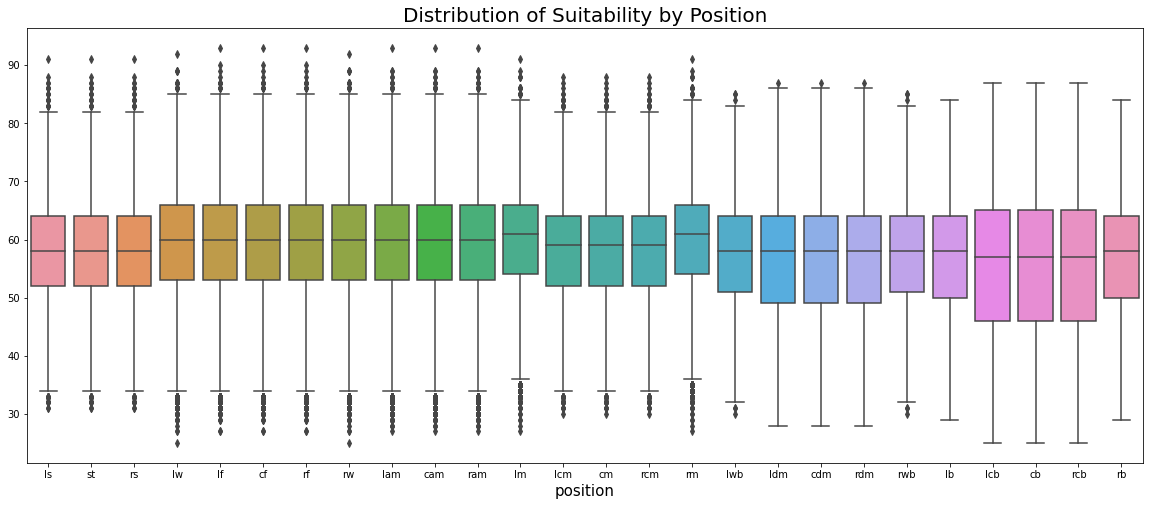

In [86]:
plt.figure(figsize=(20, 8))
sns.boxplot(data=df_stat.iloc[:,4:31])
plt.title('Distribution of Suitability by Position', fontsize=20)
plt.xlabel('position', fontsize=15)
plt.show()

### - Ability

In [87]:
stat_columns = [
    'crossing', 
    'finishing', 
    'heading_accuracy', 
    'short_passing', 
    'volleys', 
    'dribbling', 
    'curve', 
    'fk_accuracy', 
    'long_passing', 
    'ball_control', 
    'acceleration', 
    'spring_speed', 
    'agility', 
    'reactions',
    'balance', 
    'shot_power', 
    'jumping', 
    'stamina', 
    'strength', 
    'longshots', 
    'longshots', 
    'aggression', 
    'interceiptions', 
    'positioning', 
    'vision', 
    'penalties', 
    'composure', 
    'marking', 
    'standing_tackle', 
    'slideing_tackle', 
    'gk_diving', 
    'gk_kicking', 
    'gk_positioning', 
    'gk_reflees', 
    'release_clause'
]

for column in stat_columns:
    df_stat[column] = df_stat[column].replace('', 0).astype(float).replace(0, np.nan)

In [88]:
df_stat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17955 entries, 0 to 18206
Data columns (total 65 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              17955 non-null  object 
 1   overall           17955 non-null  int64  
 2   potential         17955 non-null  int64  
 3   mean              17955 non-null  float64
 4   tag               17955 non-null  object 
 5   ls                15918 non-null  float64
 6   st                15918 non-null  float64
 7   rs                15918 non-null  float64
 8   lw                15918 non-null  float64
 9   lf                15918 non-null  float64
 10  cf                15918 non-null  float64
 11  rf                15918 non-null  float64
 12  rw                15918 non-null  float64
 13  lam               15918 non-null  float64
 14  cam               15918 non-null  float64
 15  ram               15918 non-null  float64
 16  lm                15918 non-null  float6

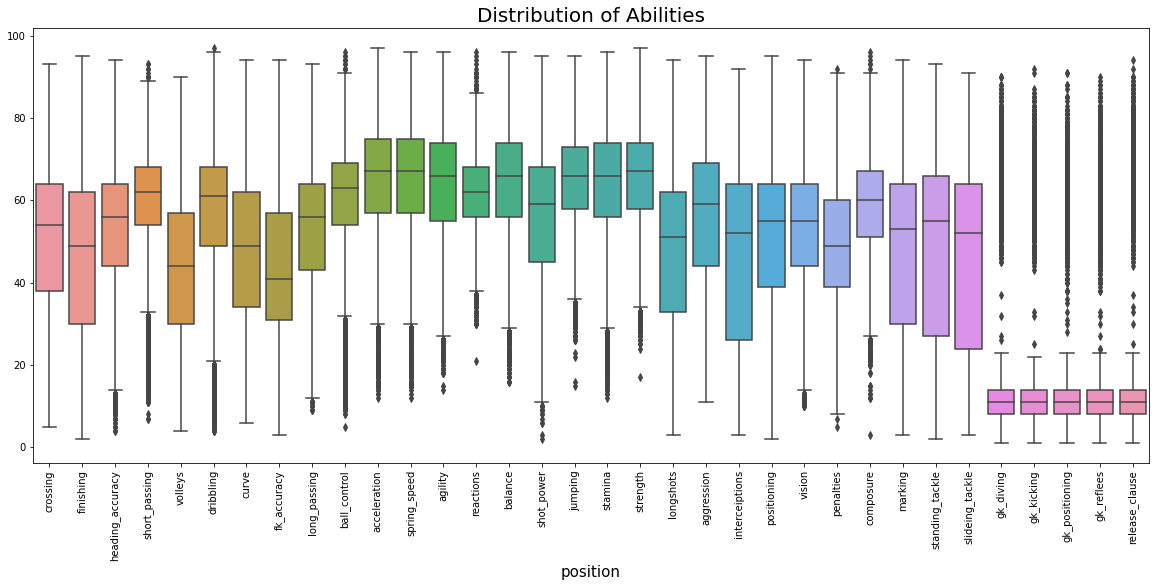

In [89]:
plt.figure(figsize=(20, 8))
sns.boxplot(data=df_stat.iloc[:, 31:])
plt.title('Distribution of Abilities', fontsize=20)
plt.xticks(rotation=90)
plt.xlabel('position', fontsize=15)
plt.show()

In [90]:
df_ability_corr = df[int_columns].corr()
df_ability_corr

,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,fk_accuracy,long_passing,ball_control,acceleration,spring_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,longshots,longshots,aggression,interceiptions,positioning,vision,penalties,composure,marking,standing_tackle,slideing_tackle,gk_diving,gk_kicking,gk_positioning,gk_reflees,release_clause
crossing,1.000000,0.661129,0.479866,0.813231,0.695451,0.859730,0.837094,0.765313,0.762004,0.844244,0.676475,0.654377,0.704861,0.410727,0.627535,0.712725,0.167406,0.679923,0.007486,0.746752,0.746752,0.485784,0.436738,0.786947,0.692231,0.653503,0.587119,0.452616,0.437644,0.418553,-0.648296,-0.645384,-0.644704,-0.645389,-0.647909
finishing,0.661129,1.000000,0.483087,0.667485,0.884421,0.826973,0.762340,0.701765,0.522298,0.791210,0.613958,0.601887,0.650499,0.351252,0.533671,0.818258,0.126185,0.520922,0.021776,0.879466,0.879466,0.259025,-0.006387,0.890738,0.701923,0.840841,0.543127,0.039139,-0.018794,-0.057974,-0.577654,-0.575968,-0.572124,-0.573793,-0.576233
heading_accuracy,0.479866,0.483087,1.000000,0.650657,0.515072,0.561140,0.451826,0.418909,0.523404,0.667821,0.350113,0.398583,0.283030,0.357328,0.196186,0.622359,0.402899,0.644509,0.505245,0.516403,0.516403,0.701120,0.555752,0.543458,0.295914,0.562496,0.525374,0.590575,0.567748,0.540163,-0.732278,-0.731399,-0.727689,-0.725862,-0.730752
short_passing,0.813231,0.667485,0.650657,1.000000,0.703435,0.847489,0.779403,0.740867,0.898744,0.914870,0.584938,0.574473,0.629333,0.515113,0.554017,0.778847,0.241843,0.728018,0.179282,0.765341,0.765341,0.625126,0.552855,0.762454,0.724027,0.685458,0.701616,0.569743,0.550336,0.517954,-0.703597,-0.701644,-0.697675,-0.697309,-0.702709
volleys,0.695451,0.884421,0.515072,0.703435,1.000000,0.812818,0.809562,0.753176,0.579296,0.798000,0.581372,0.566683,0.632005,0.410878,0.524527,0.835259,0.154439,0.537033,0.060224,0.870097,0.870097,0.344900,0.101737,0.850899,0.704174,0.833050,0.603301,0.135184,0.086059,0.048305,-0.579014,-0.576920,-0.573175,-0.574336,-0.577187
dribbling,0.859730,0.826973,0.561140,0.847489,0.812818,1.000000,0.845683,0.757800,0.729788,0.940217,0.754877,0.734083,0.770829,0.395595,0.672410,0.809693,0.177487,0.694742,0.006963,0.846296,0.846296,0.456523,0.308767,0.898552,0.736474,0.775212,0.610661,0.349210,0.313617,0.286111,-0.737753,-0.736268,-0.732722,-0.734403,-0.737710
curve,0.837094,0.762340,0.451826,0.779403,0.809562,0.845683,1.000000,0.863448,0.717450,0.832481,0.616850,0.589261,0.688452,0.430874,0.597006,0.795787,0.143109,0.599935,-0.001000,0.837237,0.837237,0.413514,0.286026,0.814317,0.748999,0.756696,0.625031,0.302957,0.274000,0.245301,-0.593533,-0.590461,-0.587360,-0.590772,-0.592543
fk_accuracy,0.765313,0.701765,0.418909,0.740867,0.753176,0.757800,0.863448,1.000000,0.709655,0.763635,0.509876,0.479581,0.598329,0.414927,0.532282,0.758603,0.114071,0.547302,0.014275,0.805470,0.805470,0.409687,0.306408,0.733651,0.721946,0.739109,0.593771,0.310057,0.290305,0.258978,-0.544806,-0.541712,-0.537757,-0.540618,-0.543224
long_passing,0.762004,0.522298,0.523404,0.898744,0.579296,0.729788,0.717450,0.709655,1.000000,0.795708,0.463336,0.448039,0.540967,0.487517,0.483000,0.681265,0.194252,0.647596,0.154350,0.674648,0.674648,0.602424,0.604171,0.623140,0.708241,0.554610,0.659867,0.595321,0.594635,0.569382,-0.577691,-0.575628,-0.571852,-0.572137,-0.576789
ball_control,0.844244,0.791210,0.667821,0.914870,0.798000,0.940217,0.832481,0.763635,0.795708,1.000000,0.688179,0.676886,0.715240,0.473084,0.616469,0.836507,0.234380,0.738457,0.129777,0.838424,0.838424,0.564845,0.431032,0.866035,0.726993,0.776118,0.688888,0.465629,0.429808,0.396996,-0.766110,-0.764350,-0.760763,-0.761110,-0.765894


Text(0.5, 1.0, 'Corr between Abilities')

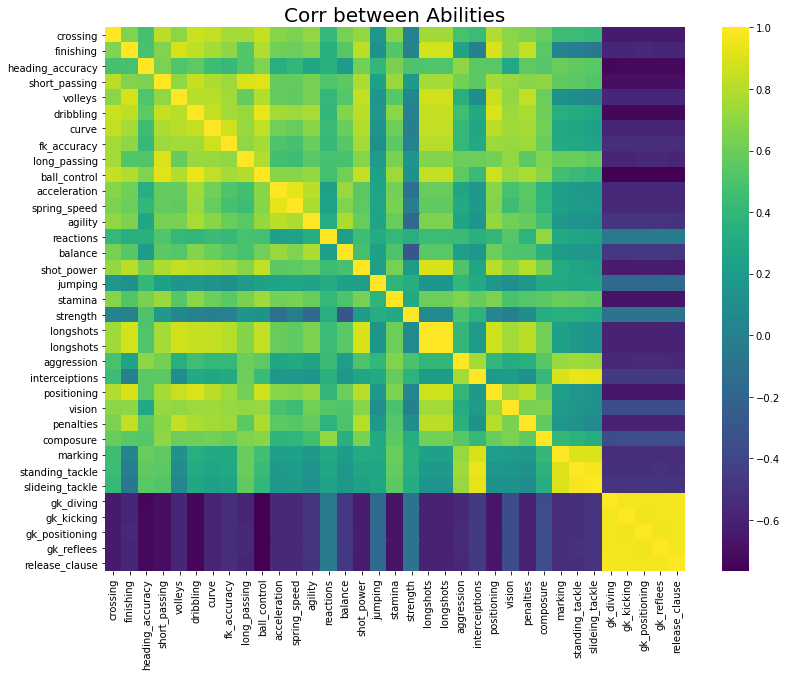

In [91]:
plt.figure(figsize=(13, 10))
sns.heatmap(df_ability_corr, cmap='viridis')
plt.title('Corr between Abilities', fontsize=20)